In [1]:
print("OK")

OK


![WhatsApp Image 2025-12-04 at 09.18.34_d37e35e8.jpg](<attachment:WhatsApp Image 2025-12-04 at 09.18.34_d37e35e8.jpg>)
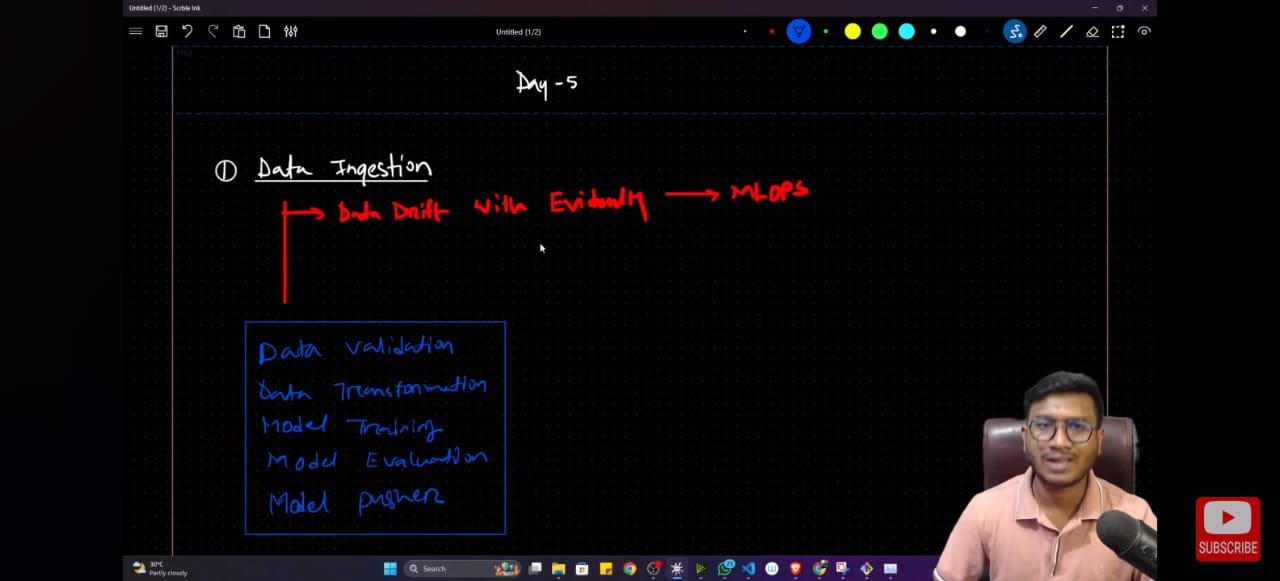

# Pipeline, it runs in order automatically
# Entities

1) Data ingestion (first component)
2) Data validation
3) Data transformation
4) Model training
5) Model evaluation
6) Model pusher   


Data Ingestion: Responsible only for getting and splitting data  
Data Validation: Validates both train and test sets independently  
Data Transformation: Transforms both sets using the same preprocessing pipeline  
Model Training: Focuses only on model training, not data preparation  

# Why data validation required?

#### Validation in machine learning is done to ensure the data you are sending into your pipeline is correct, consistent, and safe for the model to learn from. If your input data has missing columns, unexpected categories, wrong data types, or a completely different distribution compared to the data the model was originally trained on, the model will fail or produce incorrect predictions. Validation acts like a quality check before the data enters the next stage. It verifies that all required columns exist, the numerical and categorical fields are present, the schema matches the expected structure, and the data distribution has not drifted significantly. If any of these checks fail, the pipeline stops and raises an error instead of training a bad model. This prevents silent errors, avoids wasted computation, protects model accuracy, and ensures that only clean and compatible data moves forward in the ML pipeline.

# Data Validation Tool

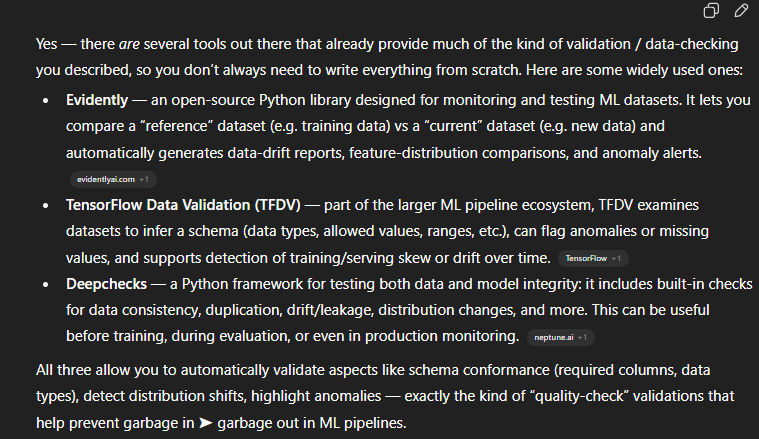

# Data Drift meaning? 
Data drift means your new incoming data has changed in its pattern, distribution, or behavior compared to the data your model was originally trained on.  

Because machine learning models learn patterns from the training data, any major change in the type of data they receive later will confuse the model and reduce accuracy.  

Data drift = the statistical properties of input data change over time, causing the model to perform poorly because it is seeing unfamiliar data.

#### Why initially split the data

Evidently drift detection needs both datasets as separate entities  
Schema validation on both train and test independently  
Early detection of data quality issues before expensive training  

#### If you split during model training:  

Data validation can't detect train-test drift  
Different random splits if pipeline re-runs  
Preprocessing might cause data leakage  
Harder to debug data issues  
Less modular architecture  

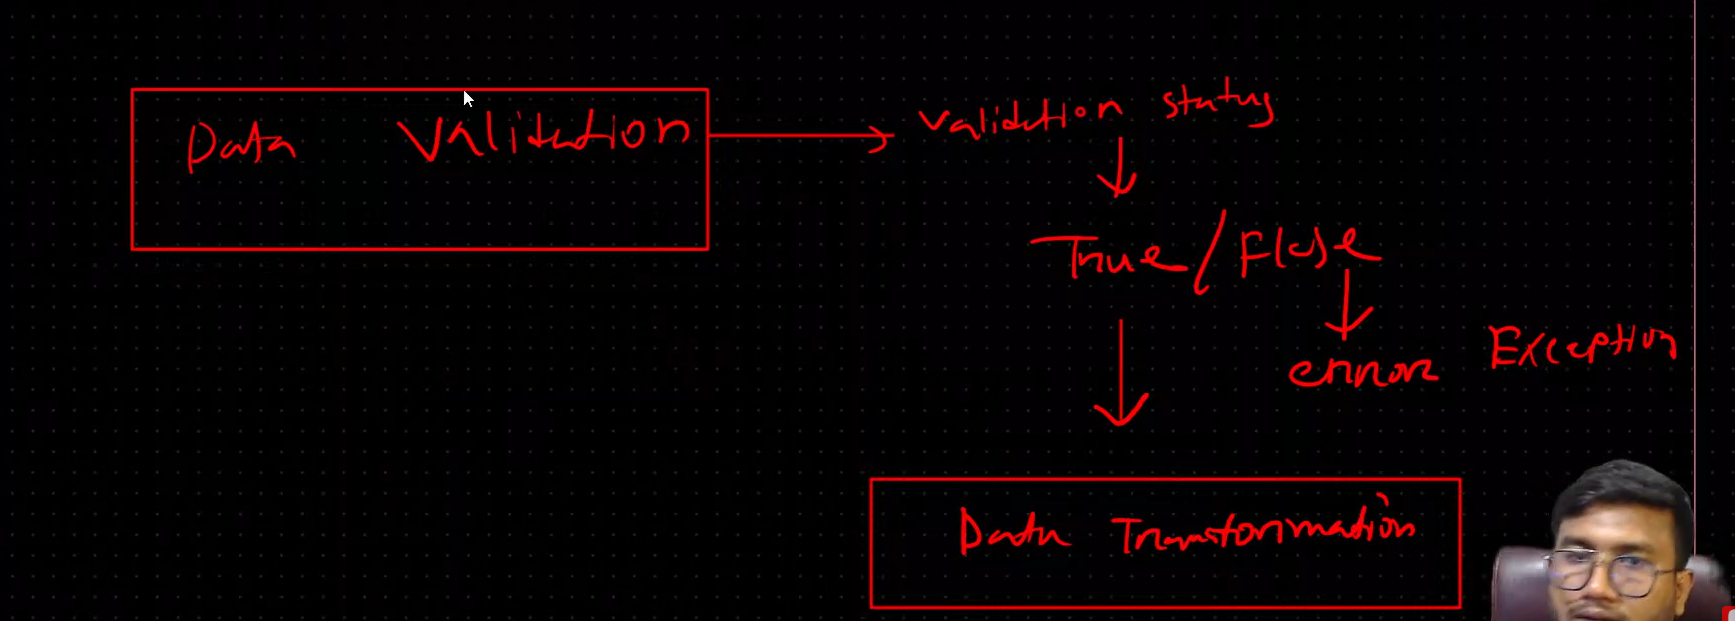

### In the context of your MLOps project, "data ingestion" typically refers to the process of loading and preparing raw data for the machine learning pipeline, rather than specifically ingesting data into a database.

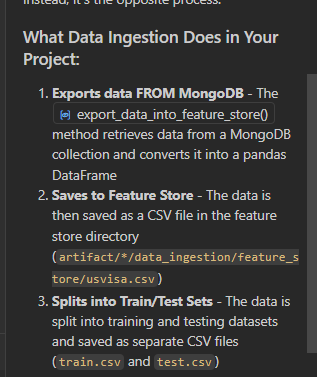

MongoDB → DataFrame → CSV (Feature Store) → Train/Test Split → CSV Files   

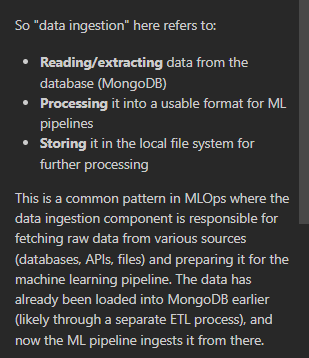

https://www.youtube.com/live/tqu9FqGY3q4?si=X69Br7BeOvSUTc4E

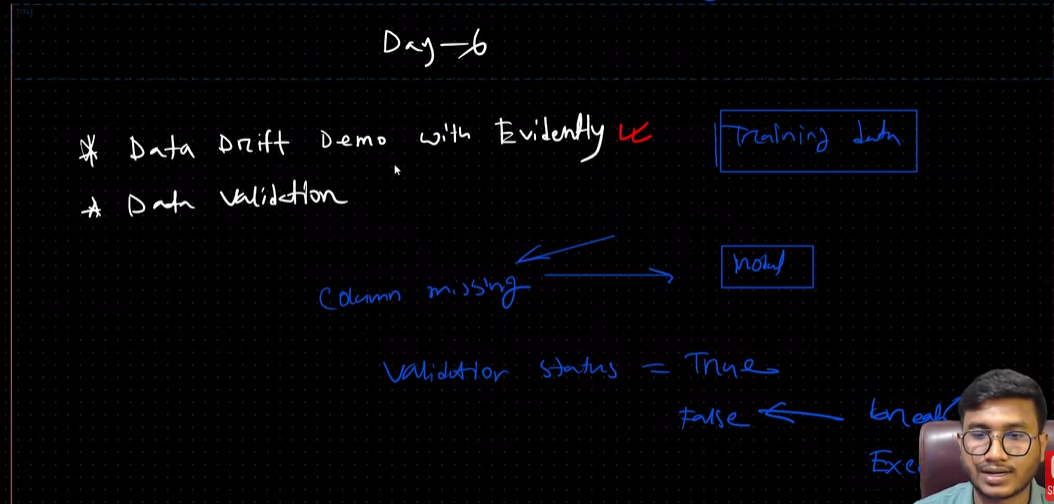

# The K-S test is likely the Kolmogorov-Smirnov test, a non-parametric test used to assess whether two distributions are different   

#### trainin and testing data should follow same distribution



#### What data transformation means  

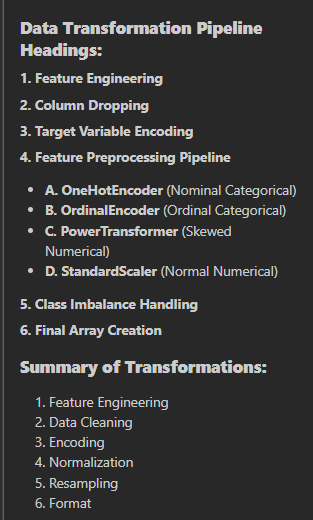

#### EDA is performed on the entire dataset
#### Feature engineering is performed after splitting the data.

#### artifact folder is the storing folder to store the generated output of the code   

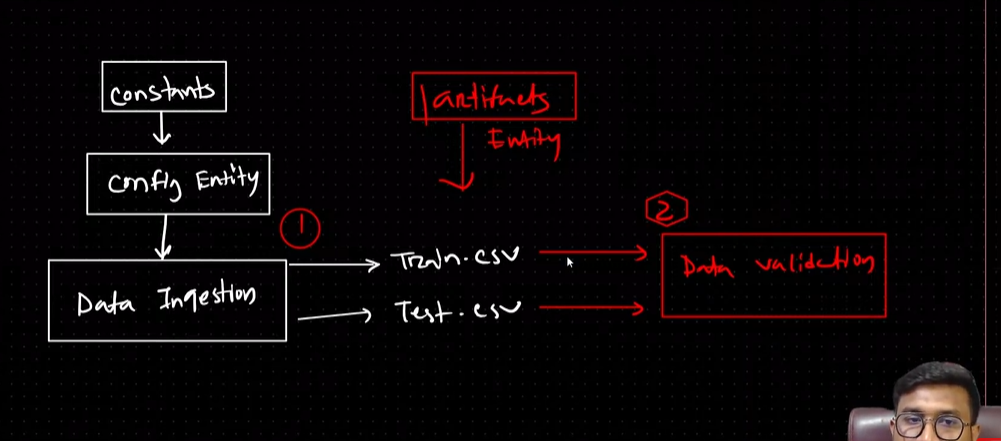   


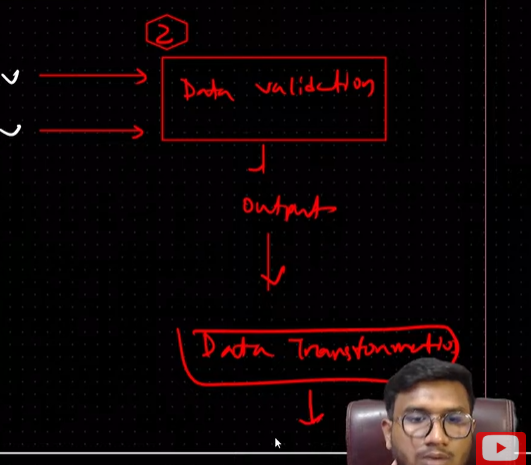  

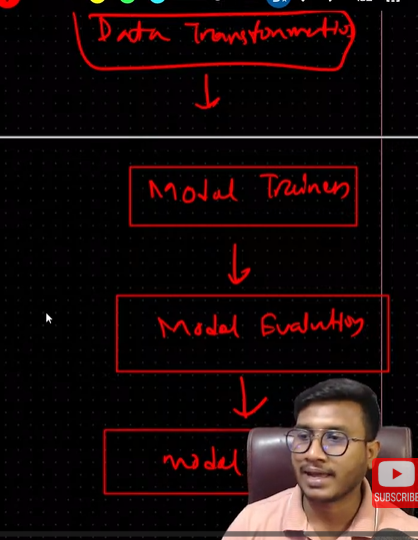

#### We dont need constructor inside class anymore because TrainingPipelineConfig is a dataclass now not a python class
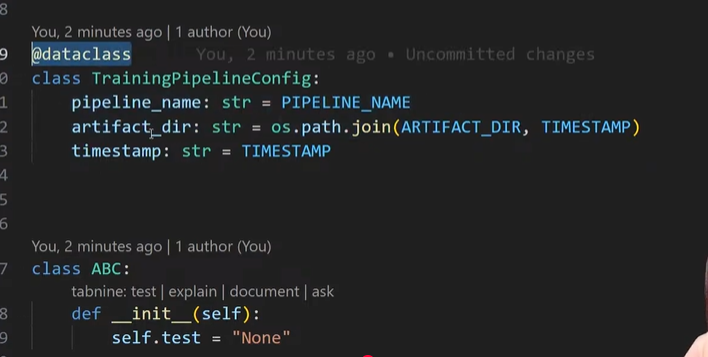

In [2]:
import pandas as pd
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, CatTargetDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

c:\Users\subin\.conda\envs\visa\Lib\site-packages\evidently\analyzers\__init__.py:3: UserWarning: analyzers are deprecated, use metrics instead
  warnings.warn("analyzers are deprecated, use metrics instead")
c:\Users\subin\.conda\envs\visa\Lib\site-packages\evidently\dashboard\__init__.py:8: UserWarning: dashboards are deprecated, use metrics instead
  warnings.warn("dashboards are deprecated, use metrics instead")
c:\Users\subin\.conda\envs\visa\Lib\site-packages\evidently\tabs\__init__.py:8: UserWarning: 'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'
  warnings.warn(
c:\Users\subin\.conda\envs\visa\Lib\site-packages\evidently\model_profile\__init__.py:8: UserWarning: model profiles are deprecated, use metrics instead
  warnings.warn("model profiles are deprecated, use metrics instead")
c:\Users\subin\.conda\envs\visa\Lib\site-packages\evidently\profile_sections\__init__.py:8: UserWarning: 'import evidently.profile_sections' is deprecated, use 'import ev

## Load out Boston data

#### Numerical K-S test

In [ ]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_frame = pd.read_csv(data_url)

#### Categorical Z-test (or Chi-square)

In [4]:
boston_frame = pd.read_csv("C:\\Users\\subin\\OneDrive\\Desktop\\MLOPS\\DSwithBappy\\MLOPS\\ML\\MLOPS-MachineLearning-Project-End2End\\data\\EasyVisa.csv")

In [5]:
boston_frame.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [6]:
boston_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# Data Drift Dashboard

In [7]:
boston_frame.shape

(25480, 12)

In [8]:
boston_frame[:200]  #train/ reference data

case_id continent education_of_employee has_job_experience  \
0     EZYV01      Asia           High School                  N   
1     EZYV02      Asia              Master's                  Y   
2     EZYV03      Asia            Bachelor's                  N   
3     EZYV04      Asia            Bachelor's                  N   
4     EZYV05    Africa              Master's                  Y   
..       ...       ...                   ...                ...   
195  EZYV196      Asia            Bachelor's                  N   
196  EZYV197    Europe              Master's                  N   
197  EZYV198    Europe              Master's                  N   
198  EZYV199      Asia              Master's                  N   
199  EZYV200    Europe              Master's                  Y   

    requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                       N            14513         2007                 West   
1                       N             2412         2002            Northeast   
2                       Y            44444         2008                 West   
3                       N               98         1897                 West   
4                       N             1082         2005                South   
..                    ...              ...          ...                  ...   
195                     N              872         1991            Northeast   
196                     N             2689         1998                South   
197                     Y             2752         2006                South   
198                     N             1375         1976                South   
199                     N             7320         1868            Northeast   

     prevailing_wage unit_of_wage full_time_position case_status  
0           592.2029         Hour                  Y      Denied  
1         83425.6500         Year                  Y   Certified  
2        122996.8600         Year                  Y      Denied  
3         83434.0300         Year                  Y      Denied  
4        149907.3900         Year                  Y   Certified  
..               ...          ...                ...         ...  
195      179675.5800         Year                  Y      Denied  
196       15814.9400         Year                  Y   Certified  
197       21511.5800         Year                  Y   Certified  
198       94252.6200         Year                  N   Certified  
199       89207.0700         Year                  Y   Certified  

[200 rows x 12 columns]

In [9]:
boston_frame[200:] #test data 

case_id continent education_of_employee has_job_experience  \
200      EZYV201      Asia             Doctorate                  Y   
201      EZYV202      Asia            Bachelor's                  Y   
202      EZYV203      Asia            Bachelor's                  Y   
203      EZYV204      Asia              Master's                  N   
204      EZYV205      Asia           High School                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
200                       N             3282         1979   
201                       N             1313         2002   
202                       N             3128         1999   
203                       N             4757         1981   
204                       N             2122         1859   
...                     ...              ...          ...   
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
200                   West         74441.11         Year                  Y   
201                   West         99469.71         Year                  Y   
202                   West         31890.66         Year                  Y   
203                Midwest        167376.13         Year                  Y   
204                Midwest        130404.72         Year                  Y   
...                    ...              ...          ...                ...   
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
200     Certified  
201     Certified  
202     Certified  
203     Certified  
204     Certified  
...           ...  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified  

[25280 rows x 12 columns]

In [10]:
boston_data_drift_dashboard = Dashboard(tabs=[DataDriftTab()])

In [11]:
boston_data_drift_dashboard.calculate(boston_frame[:200], boston_frame[200:])

c:\Users\subin\.conda\envs\visa\Lib\site-packages\scipy\stats\_stats_py.py:7400: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
c:\Users\subin\.conda\envs\visa\Lib\site-packages\scipy\stats\_stats_py.py:7400: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp
c:\Users\subin\.conda\envs\visa\Lib\site-packages\scipy\stats\_stats_py.py:7400: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs - f_exp)**2 / f_exp


In [12]:
boston_data_drift_dashboard.show()

#### reference DISTRIBUTION = Train data
#### current Distribution = test data

In [13]:
boston_data_drift_dashboard.save("boston_data_drift_report.html")

In [14]:
boston_data_drift_profile = Profile(sections=[DataDriftProfileSection()])

In [15]:
boston_data_drift_profile.calculate(boston_frame[:200], boston_frame[200:])

c:\Users\subin\.conda\envs\visa\Lib\site-packages\scipy\stats\_stats_py.py:7400: RuntimeWarning:

divide by zero encountered in divide

c:\Users\subin\.conda\envs\visa\Lib\site-packages\scipy\stats\_stats_py.py:7400: RuntimeWarning:

divide by zero encountered in divide

c:\Users\subin\.conda\envs\visa\Lib\site-packages\scipy\stats\_stats_py.py:7400: RuntimeWarning:

divide by zero encountered in divide



In [16]:
boston_data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2025-12-07 16:21:30.496832", "data": {"utility_columns": {"date": null, "id": null, "target": null, "prediction": null}, "num_feature_names": ["no_of_employees", "prevailing_wage", "yr_of_estab"], "cat_feature_names": ["case_id", "case_status", "continent", "education_of_employee", "full_time_position", "has_job_experience", "region_of_employment", "requires_job_training", "unit_of_wage"], "text_feature_names": [], "datetime_feature_names": [], "target_names": null, "options": {"confidence": null, "drift_share": 0.5, "nbinsx": 10, "xbins": null}, "metrics": {"n_features": 12, "n_drifted_features": 7, "share_drifted_features": 0.5833333333333334, "dataset_drift": true, "no_of_employees": {"current_small_hist": {"x": [-26.0, 60183.5, 120393.0, 180602.5, 240812.0, 301021.5, 361231.0, 421440.5, 481650.0, 541859.5, 602069.0], "y": [1.6277552398529144e-05, 2.214051968963643e-07, 5.978597304916662e-08, 1.2482785581694129e-08, 1.4453751726172